In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [2]:

data =pd.read_csv("/content/drive/MyDrive/MachineLearning/KNN/train.csv")

In [ ]:
  data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
data.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


from matplotlib import pyplot as plt
_df_0['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('sms').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['sms'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='label', y='sms', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [3]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['sms'])
y = data['label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       954
           1       0.99      0.68      0.81       161

    accuracy                           0.95      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.95      0.95      1115



In [6]:
class_distribution = data['label'].value_counts()

# Print the class distribution
print("Class Distribution:")
print(class_distribution)

Class Distribution:
0    4827
1     747
Name: label, dtype: int64


**As we can see in the above out put we got 95% Accuracy but as we can see from the class distribution the dataset is fully inbalanced so we need to implement SMOTE to fix this issue**

In [7]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [8]:
y_resampled.value_counts()

0    4827
1    4827
Name: label, dtype: int64

**Now our data set is balanced and we can split the dataset into training and test**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [10]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84       994
           1       0.78      1.00      0.87       937

    accuracy                           0.86      1931
   macro avg       0.89      0.87      0.86      1931
weighted avg       0.89      0.86      0.86      1931



In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8612118073537027


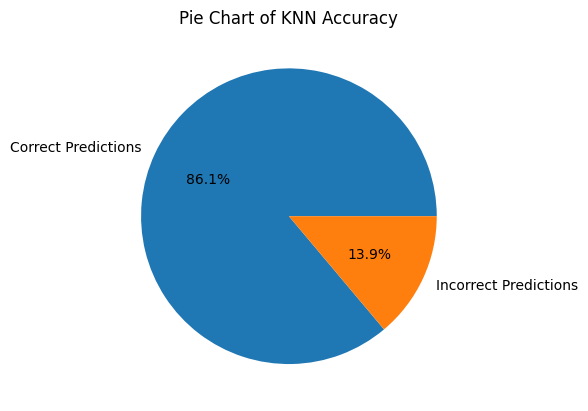

In [18]:
pie_chart_slice_labels = ['Correct Predictions', 'Incorrect Predictions']

# Define pie chart slice values based on accuracy
pie_chart_slice_values = [accuracy, 1 - accuracy]

# Create a pie chart of the accuracy
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Pie Chart of KNN Accuracy")
plt.show()

**After implementhin SMOTE our accuracy is decressed from 95% to 86%**

<Axes: >

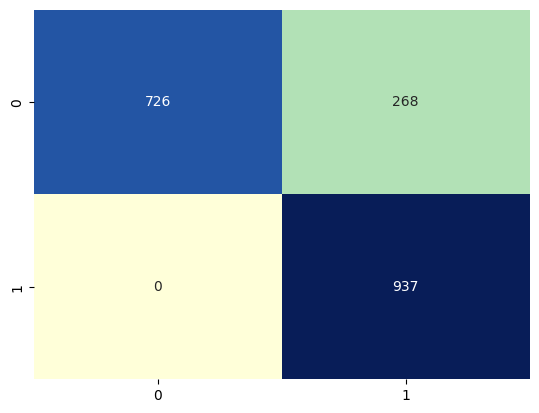

In [12]:
cm= confusion_matrix(y_test, y_pred)
# Create a heatmap with customizations

sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu', cbar=False)

In [15]:
sample_text = "You've been selected! You've won a million dollars!"

# Vectorize sample text using the same vectorizer used during training
X_unseen_vectorized = vectorizer.transform([sample_text])

# Use trained KNN model to predict labels for unseen text data
y_pred_unseen = knn.predict(X_unseen_vectorized)

# Print the predicted label for the sample text
print("Predicted label for the sample text:", "Spam" if y_pred_unseen[0] == 1 else "Not Spam")

Predicted label for the sample text: Spam
